# Introduction

Notebook to aggregate the running of models in the context of traceability between features and bug reports.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from modules.models_runner.tc_br_models_runner import TC_BR_Runner
from modules.utils import model_evaluator as m_eval
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Union Strategy

In [2]:
models_runner_1 = TC_BR_Runner()
lsi_model_1 = models_runner_1.run_lsi_model()
lda_model_1 = models_runner_1.run_lda_model()
bm25_model_1 = models_runner_1.run_bm25_model()
w2v_model_1 = models_runner_1.run_word2vec_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_expert_volunteers_union_df())
lsi_eval_1 = evaluator_1.run_evaluator(model=lsi_model_1)
lda_eval_1 = evaluator_1.run_evaluator(model=lda_model_1)
bm25_eval_1 = evaluator_1.run_evaluator(model=bm25_model_1)
w2v_eval_1 = evaluator_1.run_evaluator(model=w2v_model_1)

TestCases.shape: (207, 12)
SelectedBugReports.shape: (93, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleExpertVolunteers_UNION.shape: (207, 93)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [3]:
evaluator_1.get_evaluations_df()

,model,ref_name,perc_precision,perc_recall,perc_fscore
0,lsi,top_1_cosine_0.0,41.94,2.28,4.25
1,lsi,top_3_cosine_0.0,42.65,7.12,11.60
2,lsi,top_5_cosine_0.0,42.58,11.71,17.26
3,lsi,top_10_cosine_0.0,36.13,18.63,22.98
4,lda,top_1_cosine_0.0,9.68,0.38,0.72
5,lda,top_3_cosine_0.0,6.45,0.81,1.35
6,lda,top_5_cosine_0.0,7.74,1.77,2.68
7,lda,top_10_cosine_0.0,8.71,4.11,5.04
8,bm25,top_1_cosine_0.0,27.96,1.57,2.89
9,bm25,top_3_cosine_0.0,27.60,4.19,6.99


### Plots

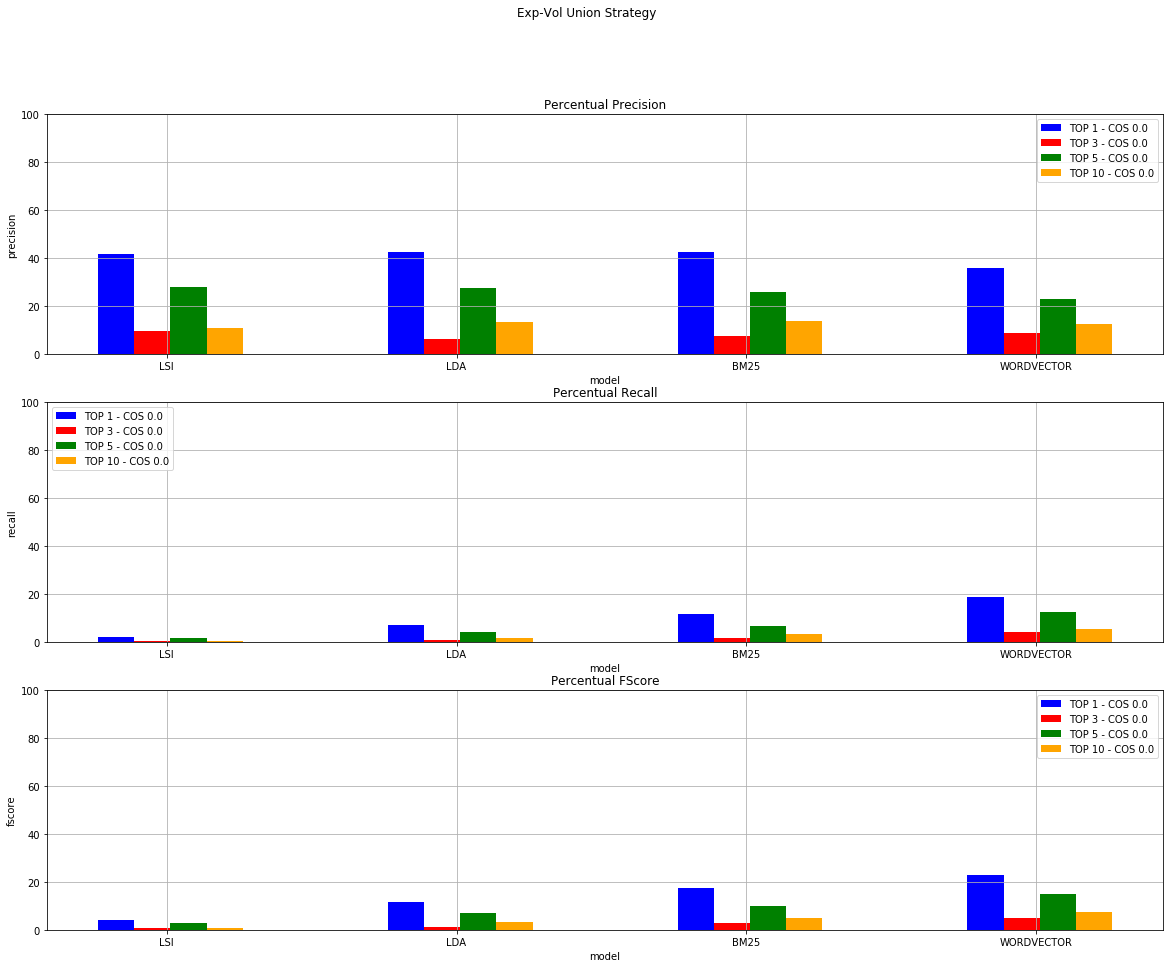

In [4]:
evaluator_1.plot_evaluations(title='Exp-Vol Union Strategy')

### Delete Variables

In [5]:
del lsi_model_1, lda_model_1, bm25_model_1, w2v_model_1
del lsi_eval_1, lda_eval_1, bm25_eval_1, w2v_eval_1
del models_runner_1, evaluator_1

## Intersec Strategy

In [6]:
models_runner_2 = TC_BR_Runner()
lsi_model_2 = models_runner_2.run_lsi_model()
lda_model_2 = models_runner_2.run_lda_model()
bm25_model_2 = models_runner_2.run_bm25_model()
w2v_model_2 = models_runner_2.run_word2vec_model()

evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_expert_volunteers_intersec_df())
lsi_eval_2 = evaluator_2.run_evaluator(model=lsi_model_2)
lda_eval_2 = evaluator_2.run_evaluator(model=lda_model_2)
bm25_eval_2 = evaluator_2.run_evaluator(model=bm25_model_2)
w2v_eval_2 = evaluator_2.run_evaluator(model=w2v_model_2)

TestCases.shape: (207, 12)
SelectedBugReports.shape: (93, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleExpertVolunteers_INTERSEC.shape: (207, 93)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [7]:
evaluator_2.get_evaluations_df()

,model,ref_name,perc_precision,perc_recall,perc_fscore
0,lsi,top_1_cosine_0.0,24.73,2.02,3.65
1,lsi,top_3_cosine_0.0,22.94,5.88,8.93
2,lsi,top_5_cosine_0.0,23.23,9.79,13.07
3,lsi,top_10_cosine_0.0,18.39,13.98,15.09
4,lda,top_1_cosine_0.0,1.08,0.08,0.15
5,lda,top_3_cosine_0.0,1.08,0.22,0.36
6,lda,top_5_cosine_0.0,1.72,0.63,0.89
7,lda,top_10_cosine_0.0,1.83,1.40,1.48
8,bm25,top_1_cosine_0.0,10.75,0.81,1.48
9,bm25,top_3_cosine_0.0,11.47,2.54,3.99


### Plots

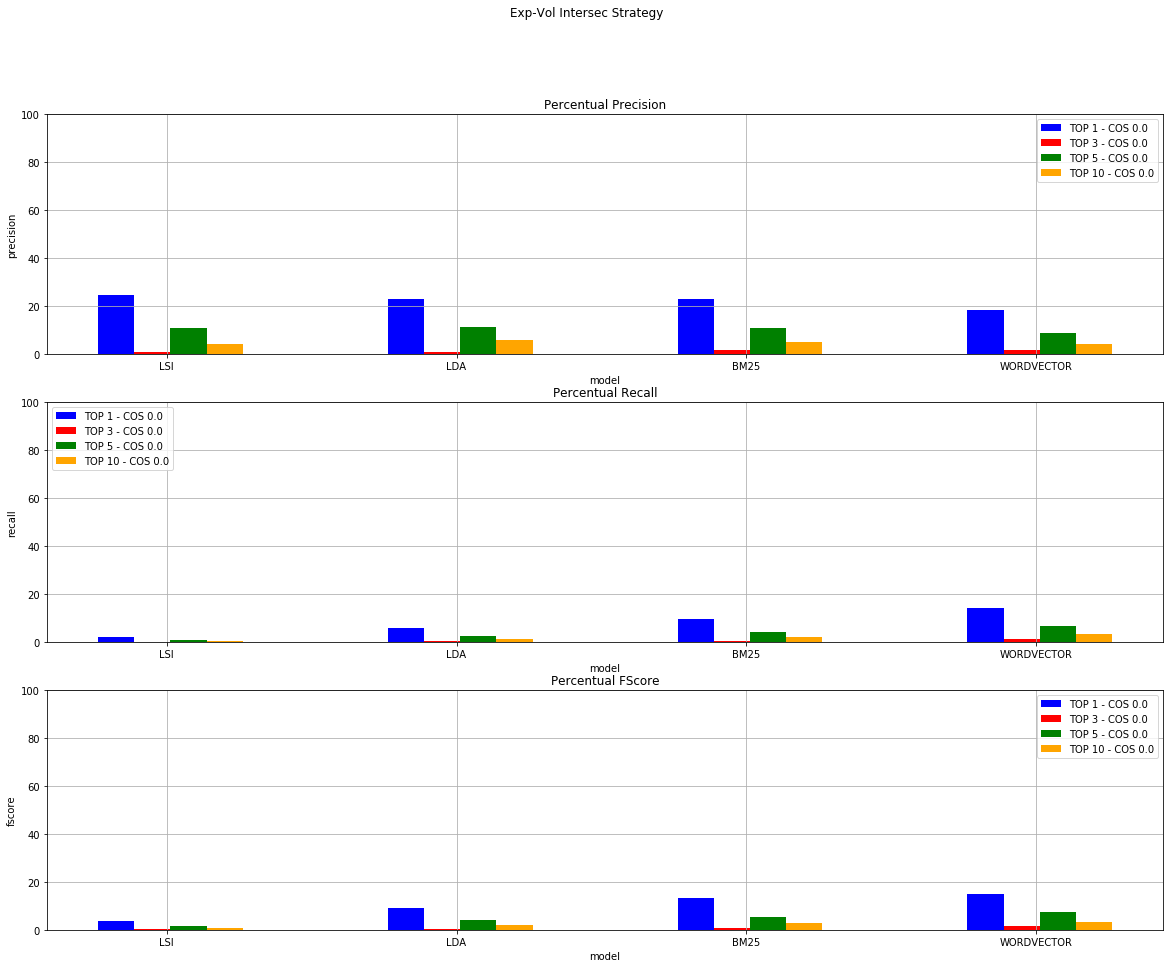

In [8]:
evaluator_2.plot_evaluations(title='Exp-Vol Intersec Strategy')

### Delete Variables

In [9]:
del lsi_model_2, lda_model_2, bm25_model_2, w2v_model_2
del lsi_eval_2, lda_eval_2, bm25_eval_2, w2v_eval_2
del models_runner_2, evaluator_2

## Expert Only Strategy

In [10]:
models_runner_3 = TC_BR_Runner()
lsi_model_3 = models_runner_3.run_lsi_model()
lda_model_3 = models_runner_3.run_lda_model()
bm25_model_3 = models_runner_3.run_bm25_model()
w2v_model_3 = models_runner_3.run_word2vec_model()

evaluator_3 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_expert_df())
lsi_eval_3 = evaluator_3.run_evaluator(model=lsi_model_3)
lda_eval_3 = evaluator_3.run_evaluator(model=lda_model_3)
bm25_eval_3 = evaluator_3.run_evaluator(model=bm25_model_3)
w2v_eval_3 = evaluator_3.run_evaluator(model=w2v_model_3)

TestCases.shape: (207, 12)
SelectedBugReports.shape: (93, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleExpert.shape: (207, 93)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [11]:
evaluator_3.get_evaluations_df()

,model,ref_name,perc_precision,perc_recall,perc_fscore
0,lsi,top_1_cosine_0.0,34.41,2.74,4.94
1,lsi,top_3_cosine_0.0,37.28,8.81,13.47
2,lsi,top_5_cosine_0.0,36.99,14.07,19.06
3,lsi,top_10_cosine_0.0,30.86,21.05,23.37
4,lda,top_1_cosine_0.0,3.23,0.23,0.43
5,lda,top_3_cosine_0.0,2.51,0.46,0.78
6,lda,top_5_cosine_0.0,3.66,1.13,1.67
7,lda,top_10_cosine_0.0,3.98,2.19,2.67
8,bm25,top_1_cosine_0.0,19.35,1.50,2.70
9,bm25,top_3_cosine_0.0,20.43,4.29,6.70


### Plots

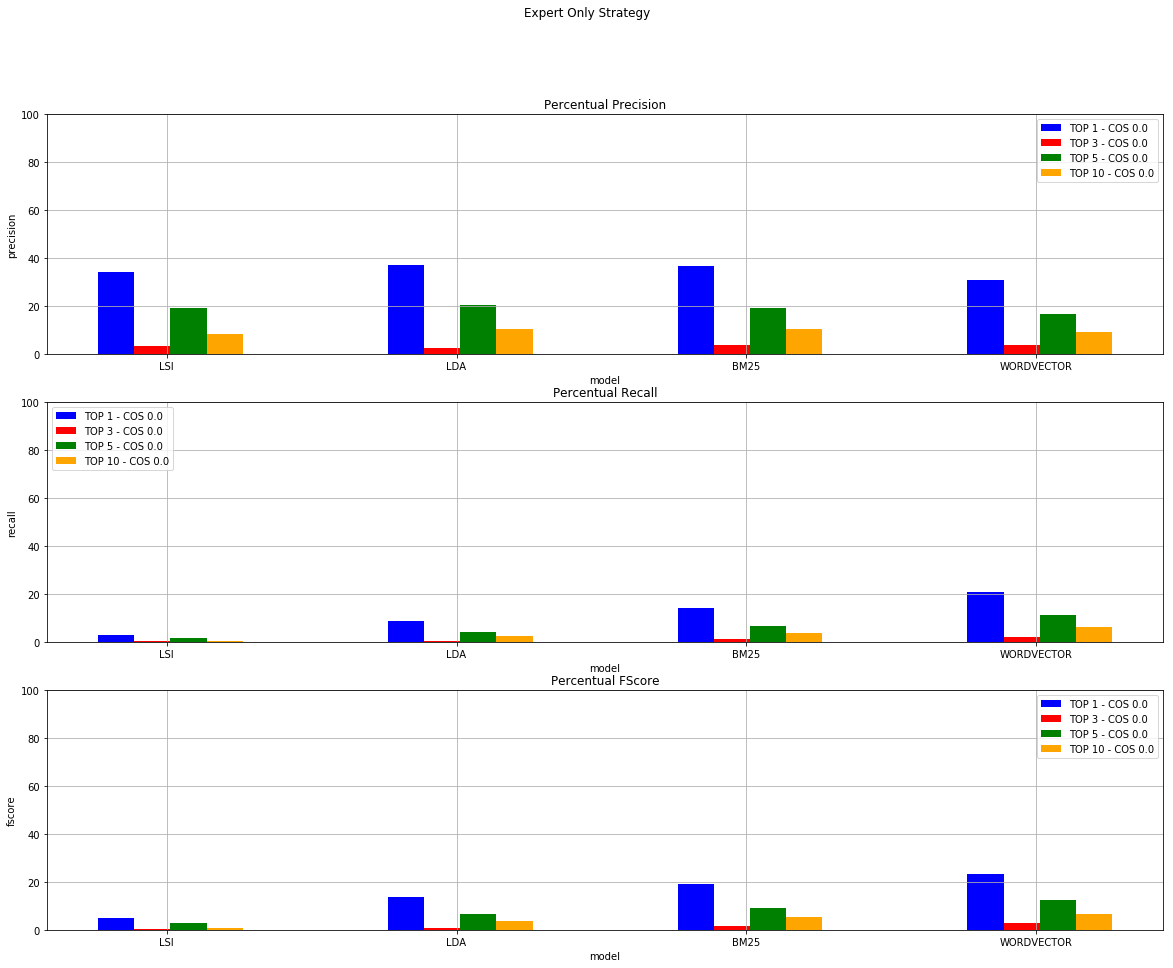

In [12]:
evaluator_3.plot_evaluations(title='Expert Only Strategy')

### Delete Variables

In [13]:
del lsi_model_3, lda_model_3, bm25_model_3, w2v_model_3
del lsi_eval_3, lda_eval_3, bm25_eval_3, w2v_eval_3
del models_runner_3, evaluator_3

## Volunteers Only Strategy

In [14]:
models_runner_4 = TC_BR_Runner()
lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

evaluator_4 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_volunteers_df())
lsi_eval_4 = evaluator_4.run_evaluator(model=lsi_model_4)
lda_eval_4 = evaluator_4.run_evaluator(model=lda_model_4)
bm25_eval_4 = evaluator_4.run_evaluator(model=bm25_model_4)
w2v_eval_4 = evaluator_4.run_evaluator(model=w2v_model_4)

TestCases.shape: (207, 12)
SelectedBugReports.shape: (93, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleVolunteers.shape: (207, 93)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [15]:
evaluator_4.get_evaluations_df()

,model,ref_name,perc_precision,perc_recall,perc_fscore
0,lsi,top_1_cosine_0.0,32.26,2.04,3.77
1,lsi,top_3_cosine_0.0,28.32,5.80,9.16
2,lsi,top_5_cosine_0.0,28.82,9.75,13.74
3,lsi,top_10_cosine_0.0,23.66,14.82,17.08
4,lda,top_1_cosine_0.0,6.45,0.34,0.63
5,lda,top_3_cosine_0.0,6.81,1.11,1.79
6,lda,top_5_cosine_0.0,7.31,2.13,3.04
7,lda,top_10_cosine_0.0,6.56,3.65,4.24
8,bm25,top_1_cosine_0.0,19.35,1.48,2.66
9,bm25,top_3_cosine_0.0,18.64,3.72,5.88


### Plots

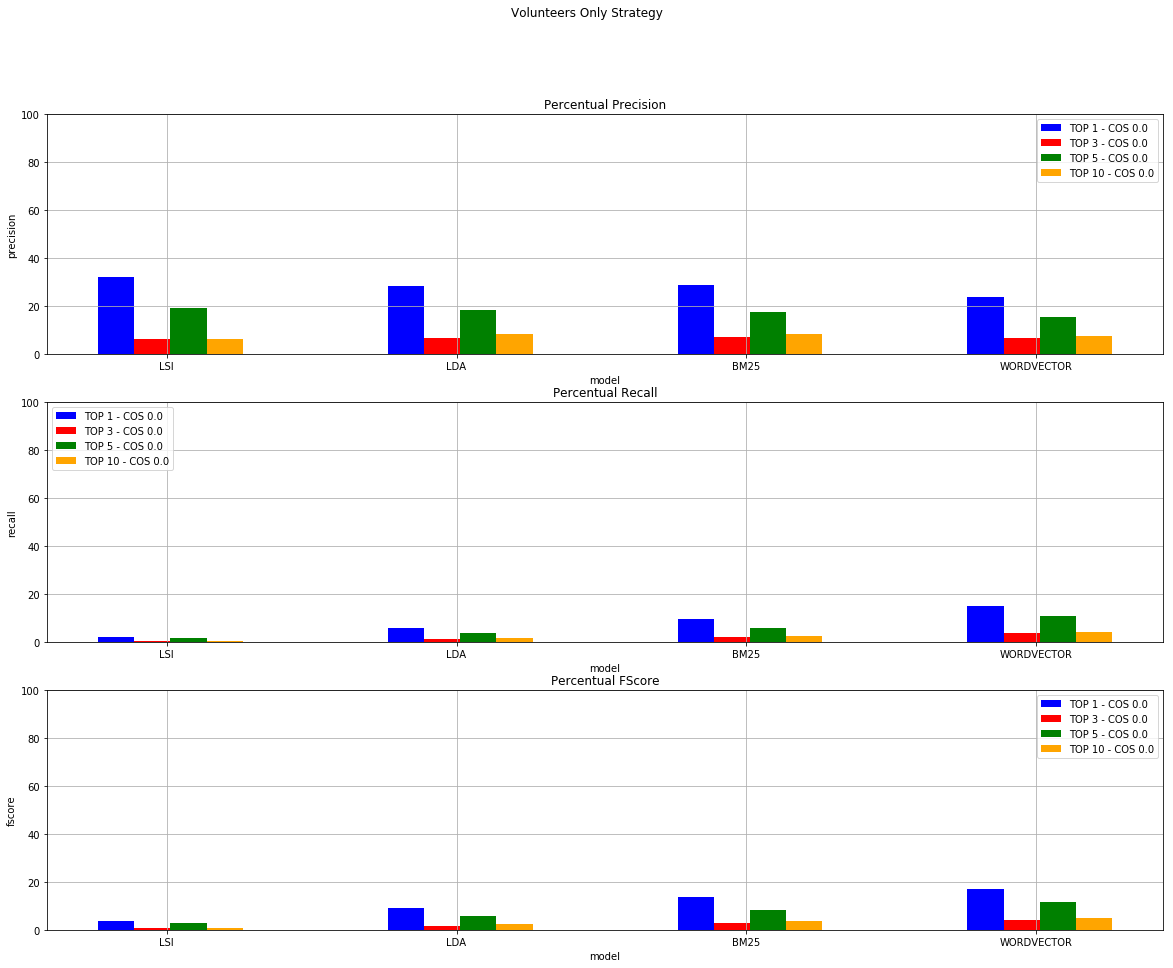

In [16]:
evaluator_4.plot_evaluations(title='Volunteers Only Strategy')

### Delete Variables

In [17]:
del lsi_model_4, lda_model_4, bm25_model_4, w2v_model_4
del lsi_eval_4, lda_eval_4, bm25_eval_4, w2v_eval_4
del models_runner_4, evaluator_4